In [1]:
import numpy as np
import LD
import NHD
import physical
import matplotlib.pyplot as plt

def run_simulation(state0, Nsteps, h, dynamic_params: dict, step_function, force_function):
    
    q_traj = [np.copy(state0[0])] 
    p_traj = [np.copy(state0[1])]
    t_traj = [0]
    
    state = np.copy(state0)
    t = 0 

    for n in range(Nsteps):
        # step function might return more than just q and p
        state = step_function(state, h, dynamic_params, force_function)
        t = t + h 

        q_traj += [state[0]] 
        p_traj += [state[1]]   
        t_traj += [t] 
        if np.abs(q_traj[-1]) > 10:
            print(f"{n=}, {q_traj[-1]=}")
            break

    q_traj = np.array(q_traj) 
    p_traj = np.array(p_traj) 
    t_traj = np.array(t_traj) 

    return q_traj, p_traj, t_traj

# LD

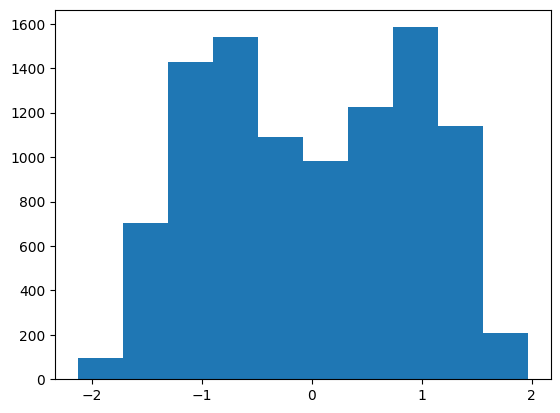

In [3]:
dynamic_params = {
    'gamma': 1.0,
    'beta': 1.0
}
q0 = np.random.uniform(-1, 1)
p0 = np.random.uniform(-1, 1)
state0 = [q0, p0]
Nsteps = 10000
h = 0.1
step_function = LD.ld_ABO
force_function = physical.F_dbl_well

q_traj, p_traj, t_traj = run_simulation(state0, Nsteps, h, dynamic_params, step_function, force_function)
plt.hist(q_traj)
plt.show()


# NHD

In [25]:
import importlib
importlib.reload(NHD)

<module 'NHD' from '/home/markalvaress/IPS/scripts/stationary_convergence/NHD.py'>

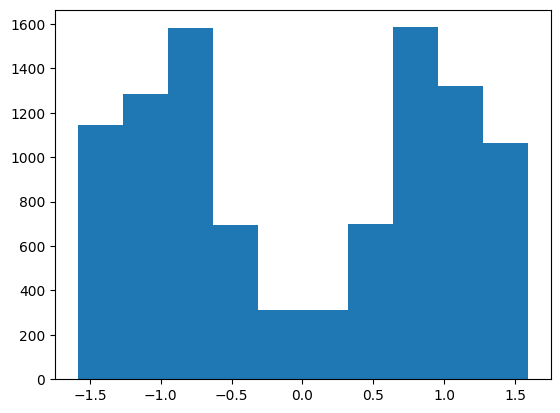

In [20]:
dynamic_params = {
    'eta': 1.0,
    'T': 1.0
}
q0 = np.random.uniform(-1, 1)
p0 = np.random.uniform(-1, 1)
xi0 = np.random.uniform(-1, 1)
#print(state0)
Nsteps = 10000
h = 0.1
step_function = NHD.NHD_ABCDBA
force_function = physical.F_dbl_well

q_traj, p_traj, t_traj = run_simulation(state0, Nsteps, h, dynamic_params, step_function, force_function)
plt.hist(q_traj)
plt.show()

# NHLD

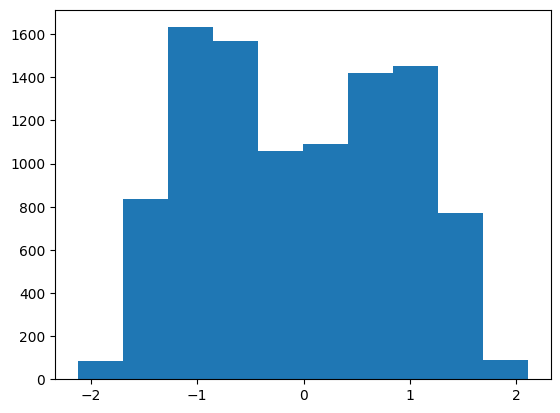

In [26]:
dynamic_params = {
    'eta': 1.0,
    'T': 1.0,
    'gamma': 1.0
}
q0 = np.random.uniform(-1, 1)
p0 = np.random.uniform(-1, 1)
xi0 = np.random.uniform(-1, 1)
#print(state0)
Nsteps = 10000
h = 0.1
step_function = NHD.NHLD_onestep
force_function = physical.F_dbl_well

q_traj, p_traj, t_traj = run_simulation(state0, Nsteps, h, dynamic_params, step_function, force_function)
plt.hist(q_traj)
plt.show()